My matrix is Pittsburgh neighborhood natual environment conditions. 
Those are steps I am going to get the result from tons of data:
1. Load the data from tsv file.
2. I choose "Park Space", "Green Way" and "Woodland" as three important index to identify the neighborhood natural environment conditions, so I need to drop the data that is not important.
3. I need to create a new column and place the sum of three important indicators in that colomn called SumGreenArea.
4. Sort this column to find the neighborhood with the largest green area.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

dataNS = pd.read_csv("NEC_Data.tsv", sep="\t")
dataNS

,Neighborhood,Sector #,Population (2010),Land Area (acres),Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),# Street Trees,Park Space (acres),Park Space (% of land area),Park Space (acres/1000 pers.),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area)
0,Allegheny Center,3,933,134.4,0.0%,0.0%,0.2%,22,55.3,41.1%,59.2,0.0%,0.0%,0.0%
1,Allegheny West,3,462,90.2,9.3%,0.0%,2.3%,229,7.2,8.0%,15.5,0.0%,4.2%,0.0%
2,Allentown,6,"2,500",188.8,27.1%,90.4%,0.0%,87,39.4,20.9%,15.8,0.0%,12.3%,0.0%
3,Arlington,7,"1,869",300.8,41.4%,57.3%,1.5%,79,6.7,2.2%,3.6,0.0%,29.4%,7.3%
4,Arlington Heights,7,244,84.5,39.9%,61.2%,0.0%,3,0.0,0.0%,0.0,0.0%,41.8%,0.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,13,"2,669",259.2,13.9%,0.0%,11.9%,246,3.3,1.3%,1.2,0.2%,6.4%,0.0%
86,West End,4,254,128.0,16.8%,0.0%,25.4%,108,7.8,6.1%,30.7,0.4%,13.2%,0.0%
87,West Oakland,14,"2,604",137.6,64.5%,19.2%,0.0%,73,1.1,0.8%,0.4,0.0%,13.4%,0.0%
88,Westwood,4,"3,066",442.9,15.2%,79.6%,0.0%,306,14.4,3.3%,4.7,0.0%,23.2%,0.0%


In [110]:
dataNS1 = dataNS.drop(['Sector #','Land Area (acres)','Flood Plain (% land area)','Population (2010)','Landslide Prone (% land area)','Undermined (% land area)','# Street Trees','Park Space (acres)','Park Space (acres/1000 pers.)','Cemetery (% of land area)'], axis = 1)
dataNS1

,Neighborhood,Park Space (% of land area),Greenway (% of land area),Woodland (% of land area)
0,Allegheny Center,41.1%,0.0%,0.0%
1,Allegheny West,8.0%,0.0%,4.2%
2,Allentown,20.9%,0.0%,12.3%
3,Arlington,2.2%,0.0%,29.4%
4,Arlington Heights,0.0%,0.0%,41.8%
...,...,...,...,...
85,Upper Lawrenceville,1.3%,0.2%,6.4%
86,West End,6.1%,0.4%,13.2%
87,West Oakland,0.8%,0.0%,13.4%
88,Westwood,3.3%,0.0%,23.2%


In [111]:
dataNS1['Park Space (% of land area)'] = dataNS1['Park Space (% of land area)'].str.rstrip('%').astype('float') / 100.0
dataNS1['Greenway (% of land area)'] = dataNS1['Greenway (% of land area)'].str.rstrip('%').astype('float') / 100.0
dataNS1['Woodland (% of land area)'] = dataNS1['Woodland (% of land area)'].str.rstrip('%').astype('float') / 100.0

dataNS1['SumGreenArea'] = dataNS1.loc[:,['Park Space (% of land area)','Greenway (% of land area)','Woodland (% of land area)']].sum(axis=1)
dataNS1

,Neighborhood,Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea
0,Allegheny Center,0.411,0.000,0.000,0.411
1,Allegheny West,0.080,0.000,0.042,0.122
2,Allentown,0.209,0.000,0.123,0.332
3,Arlington,0.022,0.000,0.294,0.316
4,Arlington Heights,0.000,0.000,0.418,0.418
...,...,...,...,...,...
85,Upper Lawrenceville,0.013,0.002,0.064,0.079
86,West End,0.061,0.004,0.132,0.197
87,West Oakland,0.008,0.000,0.134,0.142
88,Westwood,0.033,0.000,0.232,0.265


In [112]:
dataNS1.sort_values(by=['SumGreenArea'], ascending=False)


,Neighborhood,Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea
65,Regent Square,0.516,0.000,0.333,0.849
35,Glen Hazel,0.000,0.159,0.646,0.805
37,Hays,0.001,0.000,0.717,0.718
60,Perry North,0.333,0.000,0.376,0.709
24,Duquesne Heights,0.229,0.166,0.295,0.690
...,...,...,...,...,...
41,Homewood South,0.011,0.000,0.000,0.011
21,Chateau,0.006,0.000,0.000,0.006
43,Knoxville,0.000,0.000,0.005,0.005
10,Bluff,0.000,0.000,0.000,0.000


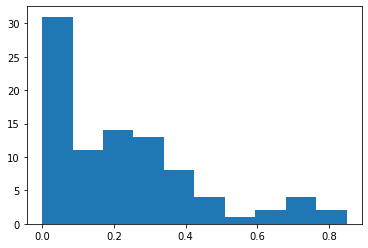

In [113]:
plt.hist(dataNS1['SumGreenArea'])
plt.show() 